# Numerical and Computational Methods with Python

From the lecture notes "Numerical and Computational Methods with Python" by 
Professor Nikolay Gromov

In [45]:
import matplotlib
from numpy import *
from matplotlib .pyplot import *
from mpmath import *

In [6]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

### 1. Using Matplotlib: examples

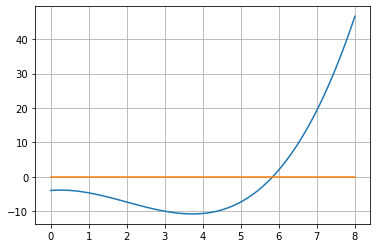

In [37]:
xs = linspace(0,8,100)
ys = [f(x) for x in xs]
plot(xs,ys)
xs = linspace(0,8,100)
ys= [0 for x in xs]
plot(xs,ys)
grid()

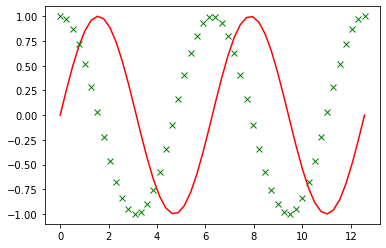

In [5]:
xs = linspace (0 ,4*pi)
ys1 = sin(xs)
ys2 = cos(xs)
plot(xs ,ys1 ,'r') 
plot(xs ,ys2 ,'gx')
show ()

---

### 2. Solution of a single non-linear equation

1. Newton Method

In [19]:
def f(x):
    return x**3/3-2*x**2+x-4                      # (x^3)/3 - 2x^2 + x - 4
def df(x):
    return x**2-4*x+1                             # the derivative x^2 - 4x + 1

def newton(f,df ,x0):
    xs = [x0]
    for i in range(10):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))    #append adds new elements to the list
    return xs[-1]

In [20]:
newton(f,df ,8.)

5.838208095398307

2. Secant method

In [108]:
def f(x):
    return x**3/3-2*x**2+x-4                            # f(x) same as above

def secant(f,x0,xm1):
    x = [xm1,x0]
    for i in range(10):
        x.append ((x[-1]*f(x[-2])-x[-2]*f(x[-1]))/
                  (f(x[-2])-f(x[-1])))                  # formula
    return x[-1]

In [68]:
secant(f,8,5)

5.838208095398307

 3. Bisection method

In [24]:
def bisection (f,a,b):
    for i in range(10):
        c=(a+b)/2                         # to find the midpoint
        if abs(f(c))<1/10**10:            # estimated root very close to the root
            print("found zero",c)         # found root
            return c
        if f(a)*f(c)<0:                   #we know the root is between a and c 
            a=a
            b=c
        else:                             # if it's not, then between b and c
            a=c
            b=b
        print("a=",a,"b=",b,"f(a)=",f(a))

In [26]:
bisection(f,5.5,6.5)                       # will slowly converge to the actual root

a= 5.5 b= 6.0 f(a)= -3.5416666666666643
a= 5.75 b= 6.0 f(a)= -1.0052083333333357
a= 5.75 b= 5.875 f(a)= -1.0052083333333357
a= 5.8125 b= 5.875 f(a)= -0.299072265625
a= 5.8125 b= 5.84375 f(a)= -0.299072265625
a= 5.828125 b= 5.84375 f(a)= -0.11790339152018703
a= 5.8359375 b= 5.84375 f(a)= -0.026618480682373047
a= 5.8359375 b= 5.83984375 f(a)= -0.026618480682373047
a= 5.837890625 b= 5.83984375 f(a)= -0.0037241255243571914
a= 5.837890625 b= 5.8388671875 f(a)= -0.0037241255243571914


##### Checking precision by improving Newton Method code

In [83]:
mp.dps = 100
def newtonHP(f,df,x0,precision):
    n = 0;
    x = [mpf(x0)];
    while (abs(f(x[-1]))>10**(-precision)) and (n<100):
        n = n+1;
        x.append(x[-1]-f(x[-1])/df(x[-1]))
    return x

Verify the quadratic convergance rate of the Newton Method by computing the number of exact digits plotting the result. Example: $f(x)=x^2-3$ and knowing that $ x^* =\sqrt{3}$

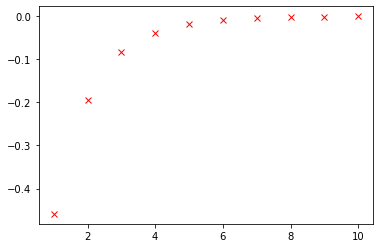

In [95]:
result= newtonHP(f,df,10,50)

numberOfDigitsOverqSquare =[];
ns = [];
n = 0;
for x in result:
    n = n+1;
    ns.append(n)
    numberOfDigitsOverqSquare.append(
        float(-log(abs(x-3**mpf (0.5)))/ log (10))/2**n)

import pylab as plt
plt.plot(ns , numberOfDigitsOverqSquare ,"rx");
plt.show ()

#### Drawing Newton Fractals

In [43]:
from PIL import Image                                # empty image is created
sizex = 700; sizey = 700 
image = Image.new("RGB", (sizex , sizey))

xmin = 0.0; xmax = 6.0                              # drawing area
ymin = -3.0; ymax = 3.0

roots = [complex(5.83821 ,0),
         complex (0.080896, 1.43139),               #3 possible roots
         complex (0.080896 ,-1.43139)]


for i in range(sizey):                              # drawing the fractal
    zy = i*(ymax - ymin)/(sizey - 1) + ymin
    for j in range(sizex):
        zx = j * (xmax - xmin) / (sizex - 1) + xmin
        z = complex(zx , zy)
        n = 0;
        while abs(f(z))> 1/10**10:
            n = n + 1;
            z = z - f(z) / df(z)
        if abs(z-roots [0]) < 1/10**5:               # choosing the color depending on the iter. n and on the root
            image.putpixel ((j, i), (255 - n % 32 * 8 , 0, 0))
        if abs(z-roots [1]) < 1/10**5:
            image.putpixel ((j, i), (0 , 255 - n % 32 * 8, 0))
        if abs(z-roots [2]) < 1/10**5:
            image.putpixel ((j, i), (0 , 0, 255 - n % 32 * 8))
            
            

image.save("Newton Fractals.png", "PNG")             # save the result as a PNG in the computer

### 3. Approximation of Functions by Polynomials

1. Lagrange Interpolation

In [100]:
def pbasis(x,i,xs):
    xi = xs[i]
    res = 1;
    for xj in xs:
        if xj != xi:
            res = res*(x-xj )/(xi-xj)
    return res

def lagrange(x,ys,xs):
    res = 0;
    for i in range(len(ys)):
        res = res + ys[i]*pbasis(x,i,xs[:])
    return res

0.4657645976562499

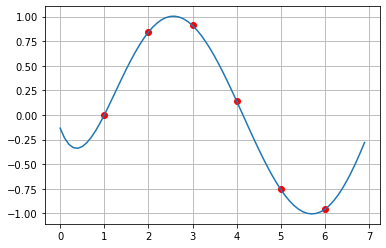

In [107]:
xs=[1 ,2 ,3 ,4 ,5 ,6];
ys =[0. ,0.841471 ,0.909297 ,0.14112 ,-0.756802 ,-0.958924];
lagrange (1.5 ,ys ,xs)

xdense = np.arange (0 ,7 ,0.1)
plt.plot(xs , ys ,'ro')
plt.plot(xdense,lagrange(xdense ,ys ,xs))
grid()

2. Polynomial Fit

In [109]:
def findas(m,xs,ys):
    A= array([[0]*(m+1)]*(m+1))    #creating an empty matrix
    b= array([0]*(m+1))            #creating an empty vector
    for k in range(m+1):           #filling in A and b with values
        b[k]= sum(ys*xs**k)        #following from the formula
        for i in range(m+1):
            A[k,i]= sum(xs**(k+i)) #following from the formula
    coefs= linalg.solve(A,b)
    print (coefs)                  #coefficients of the linear equation
    
    def fit(x):
        return sum(coefs*(x**array(range(len(coefs)))))
    return fit

[ 8.55       -6.50535714  1.79464286]


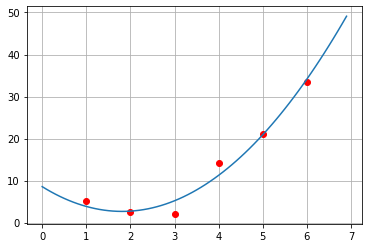

In [125]:
xs = array([1,2,3,4,5,6]);
ys = array([5.21659,2.53152,2.05687,14.1135,20.9673,33.5652]);
ft = findas(2,xs,ys)

xd = arange(0,7,0.1)
fitlist = list(map(lambda x: ft(x),xdense))

plt.plot(xs,ys,'ro')
plt.plot(xdense,fitlist)
grid()

3. Numerical Differentiation

In [130]:
from mpmath import *
mp.dps = 40
def f(x):
    return x**3+2*x
def df(x):
    return 3*x**2+2
def numberOfGoodDigits (h):
    differencempf =(f(1+h)-f(1-h ))/(2*h) - df (1)
    return float(-log(abs( differencempf ))/ log (10))

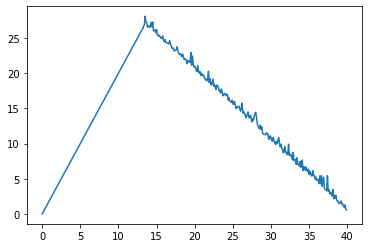

In [136]:
xdense = arange (0 ,40 ,0.1)
plt.plot(xdense ,[ numberOfGoodDigits (10**(-x)) for x in xdense ])
plt.show ()

In [144]:
def f(x):
    return cos(x)
def df(x):
    return -sin(x)

def dfaprox(x,h):
    return ((f(x+h)-f(x-h))/(2*h))   #formula for derivative

def ddfapprox(x,h):
    return((f(x+h)-2*f(x)+f(x-h))/h**2)  #formula for second derivative

dfaprox(1,1/10)-df(1)      

mpf('0.001401750582460900910166874780368114614156504')

In [145]:
def error(x,h):
    return dfaprox(x,h)-df(x)

error(1,1/100)

mpf('0.00001402444629032001009039275298108423829252698')

In [147]:
for i in range(1,17):          
    h= 1/10**i
    print("h=",h," and the error is",error(1,h))

h= 0.1  and the error is 0.001401750582460900910166874780368114614157
h= 0.01  and the error is 0.00001402444629032001009039275298108423829253
h= 0.001  and the error is 0.0000001402452031335245498102370651539301668106
h= 0.0001  and the error is 0.000000001402544355639374585402979553949851970307
h= 1e-05  and the error is 0.00000000001318300946346175257311644251357269769829
h= 1e-06  and the error is 0.00000000002265420283390032221306260840099151339571
h= 1e-07  and the error is -0.00000000002419572295857422161426555619094584101993
h= 1e-08  and the error is 0.0000000004429132352276514793487532415511685920832
h= 1e-09  and the error is -0.00000002291259835103310110191454162011694528227
h= 1e-10  and the error is -0.00000006962362143731725445448436058625118573633
h= 1e-11  and the error is -0.00000006962362151888683142691179821624346012158
h= 1e-12  and the error is -0.0000280962374781468547209719872610118342264
h= 1e-13  and the error is 0.0002054588779938886044217321842062604130053
h

4. Richardson Extrapolation

In [150]:
h1= 1/100
h2= 1/200          #h1 is the double of h2
p=2                #use these values unless given 
richardson= ((h1/h2)**p*dfaprox(3,h2)-dfaprox(3,h1))/(((h1/h2)**p)-1) #for f,x given in Q but here x=3
print(richardson)

-0.1411200080569242195912707437939174222854


### 4. Numerical Integration

1. Trapezoidal rule

In [139]:
def trapezoidal (f,a,b,n):     # a,b - integration limits, 
    fs = list(map(lambda x: f(x), arange(a,b+(b-a)/n,(b-a)/n)));
    return (sum(fs)-(fs [0]+ fs[-1])*0.5)*(b-a)/n

For $$\int_{-1}^{a} \frac{2}{x^2+1} \,dx$$

In [141]:
def f(x):
    return 2/(x**2+1)
trapezoidal (f,-1,1,1000)

mpf('3.141591986923126548158789929383066403771513')

2. Midpoint Rule

In [151]:
def midpoint(a,b,f,n):
    h = (b-a)/n
    xs = linspace(a+h/2,b-h/2,n) # n points this time!
    fs = [f(x) for x in xs]
    return sum(fs)*h

m10 = midpoint(0,1,cos,10)-sin(1)
m10

mpf('0.0003507151993992815294652279201508842001919756')

3. Simpson's rule

In [154]:
def simpson(a,b,f,n):
    return (trapezoidal(f,a,b,n)+2*midpoint(a,b,f,n))/3

simpson(0,1,cos,10)-sin(1)

mpf('0.0165650030146692191214446915752198332255043')

4. Gaussian Integration Method

In [173]:
import math
from numpy import *
a,b = -1,+1
def w(x):
    return math.exp(-x**2)

In [174]:
from scipy import integrate
def h(k):
    return integrate.quad(lambda x: w(x)*x**k,a,b)[0]

In [179]:
a,b = -1,1
def h(k): #define a measure function
    return ((-1)**k+1)/(k+1) #given

In [181]:
#first find coeffecients of the orthogonal polynomial
n = 5
B = zeros([n+1,n+1]) #start from an empty matrix
b = zeros(n+1)
for k in range(n+1):
    for i in range(n+1):
        B[k,i] = h(i+k)
#building the R.H.S
for k in range(n+1):
    b[k] = -h(n+1+k)
c= linalg.solve(B,b)

#finding roots
p = [1] + list(c)[::-1] #reverse and add leading 1 for x**n coeffecient
xs = roots(p) #find the nodal points x_i

#finding weights
B = zeros([n+1,n+1])
b = zeros (n+1)
for m in range(n+1):
    for i in range(n+1):
        B[m,i] = xs[i]**m #order of indices is important
for m in range(n+1):
    b[m] = h(m)
As = linalg.solve(B,b)

xs,As      
        

(array([-0.93246951, -0.66120939,  0.93246951,  0.66120939, -0.23861919,
         0.23861919]),
 array([0.17132449, 0.36076157, 0.17132449, 0.36076157, 0.46791393,
        0.46791393]))

In [182]:
def f(x): #compute the integral
    return 2/(1+x**2)

sum(As*f(xs))

3.1414634146341465

5. Monte Carlo Method

In [183]:
#Volume of a 3D unit sphere
N = 10000 #total number of points to use
n = 0 #set counter to zero
for i in range(N):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    z = random.uniform(-1,1)
    if (x**2+y**2+z**2<1):
        n = n+1
p = n/N #estimate of the probability
S = 2*2*2 # total volume of sphere
S1 = S*p
S2 = S-S1
error = sqrt(S1*S2/N)
print("result:",S1,"error:", error,"exact result:", 4.0*pi/3,"actual error:", S1-(4*pi)/3)

result: 4.1592 error: 0.03996830664413993 exact result: 4.1887902047863905 actual error: -0.029590204786390295


### 5. Numerical solution of ODE

1. Euler's method

In [184]:
def exact(x): #exact solution for comparison and test
    return exp(sin(4*x)/4)

#equation of the type y'(x) = F(x,y(x))
#euler: y(x+h) = y(x)+h*F(x,y(x))
#below is an example
def F(x,y):
    return y*cos(4*x)

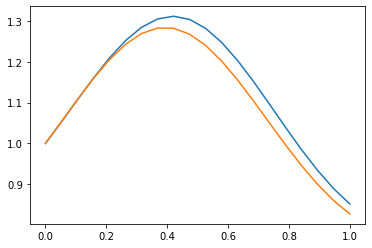

In [186]:
n= 20
xs = linspace(0,1,n) #generate n points
h = xs[1]-xs[0] #1/n-1
ys = zeros(n) #empty list of values y(xs)
ys[0] = 1 #starting point
for i in range(n-1):
    x = xs[i]
    y = ys[i]
    ys[i+1] = y+h*F(x,y)
zs = [exact(x) for x in xs]

plt.plot(xs,ys)
plt.plot(xs,zs)

In [190]:
def euler(alpha ,a,b,N):
    h = (b-a)/N;
    ys = zeros ((N+1, alpha.size ));
    ys [0] = alpha;
    xs = arange(a,b+h,h)
    for i in range(N):
        ys[i+1] = ys[i] + h*F(a + i*h, ys[i])
    return xs ,ys

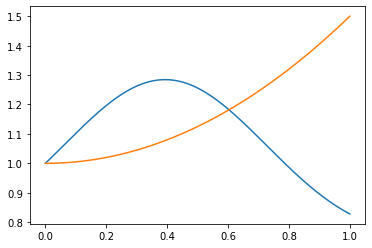

In [191]:
def f(x,yvec):
    return x
alpha=array ([1])
xs,ys=euler(alpha ,0 ,1 ,1000)
# plot of the result

%matplotlib inline
import matplotlib .pylab as plt
plt.plot(xs ,ys [: ,0])
plt.plot(xs ,1+ xs**2/2)
plt.show ()

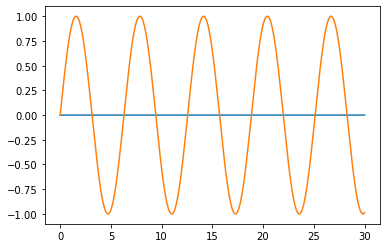

In [193]:
def f(x,yvec ):
    return -yvec [0]
alpha=array ([0 ,1])

xs ,ys=euler(alpha ,0 ,30 ,2000)
plt.plot(xs ,ys [: ,0])
plt.plot(xs ,sin(xs))
plt.show ()

2. Runge-Kutta Method

In [194]:
def rungekutta (alpha ,a,b,N):
    h = (b-a)/N;
    ys = zeros ((N+1, alpha.size ));
    ys [0] = alpha;
    xs = arange(a,b+h,h)
    for i in range(N):
        ys[i+1] = ys[i] + h/2*(F(a + i*h, ys[i])
                               +F(a + i*h+h, ys[i]+h*F(a + i*h, ys[i])))
    return xs ,ys

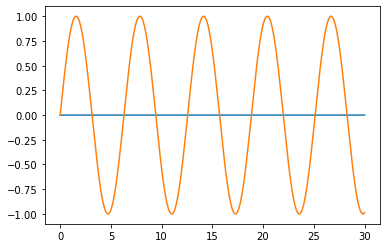

In [195]:
def f(x,yvec ):
    return -yvec [0]
alpha=array ([0 ,1])

xs ,ys= rungekutta (alpha ,0 ,30 ,2000)
plt.plot(xs ,ys [: ,0])
plt.plot(xs ,sin(xs))
plt.show ()

3. 4th order Runge-Kutta Method

In [196]:
def rungekutta4 (alpha ,a,b,N):
    h = (b-a)/N
    n = alpha.size
    xs = arange(a,b+h/2,h)
    ys = zeros ((N+1,n))
    ys [0] = alpha # starting point for the recursion
    for i in range(0,N):
        xi = a+i*h
        K0 = h*F(xi ,ys[i])
        K1 = h*F(xi+h/2,ys[i]+K0 /2)
        K2 = h*F(xi+h/2,ys[i]+K1 /2)
        K3 = h*F(xi+h,ys[i]+K2)
        ys[i+1] = ys[i]+1/6*( K0 +2*K1 +2*K2+K3)
    return xs ,ys

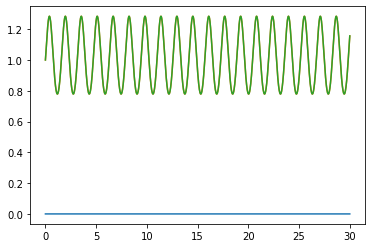

In [200]:
zs = [exact(x) for x in xs]
plt.plot(xs,ys)
plt.plot(xs,zs)

4. Shooting Method

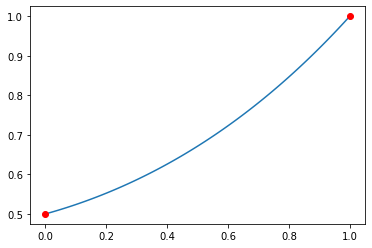

In [203]:
ts = linspace(0,1,100);
h = ts[1]-ts[0]
y0 = [1/2]
y1 = [0.21548361751961317] # just to try, not known
for i in range(99):
    y0.append(y0[-1]+y1[-1]*h) # like last time, the role of F is played by y1
    y1.append(y1[-1]+sin(y0[-1])*h)
plt.plot(ts,y0)
plt.plot([0,1],[1/2,1],"ro") # now it works perfectly

In [204]:
def displacement(alpha):
    ts = linspace(0,1,100);
    h = ts[1]-ts[0]
    y0 = [1/2]
    y1 = [alpha] 
    for i in range(99):
        y0.append(y0[-1]+y1[-1]*h) # like last time, the role of F is played by y1
        y1.append(y1[-1]+sin(y0[-1])*h)
    return y0[-1]-1 # computes how far we are from the target

displacement(1/4-2/100)

0.016440700592511348

In [205]:
def f(x):
    return displacement(x)
def df(x):
    h = 1/1000
    return (f(x+h)-f(x-h))/(2*h) # numerical differentiation
def newton(f,df,x0):
    xs = [x0]
    for i in range(10):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))
    return xs[-1]
newton(f,df,1/4) # result

0.21548361751961317

### 6. Stochastic differential equations

1. Euler-Maruyama Method

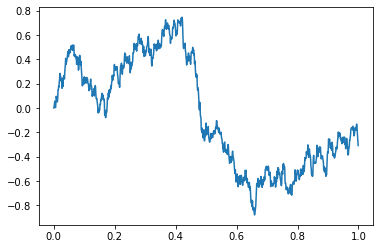

In [220]:
def brownian(T,sigma):
    dt=0.001;
    ts = arange(0,T,dt)
    N = ts.size
    xs = zeros(N)
    xs[0]=0
    sdt = sqrt(1*dt)
    for i in arange(1,N):
        xs[i] = xs[i-1] + sigma*random.normal(0,sdt)
    return ts, xs

ts,xs = brownian(1,1)
plt.plot(ts,xs)
plt.show()

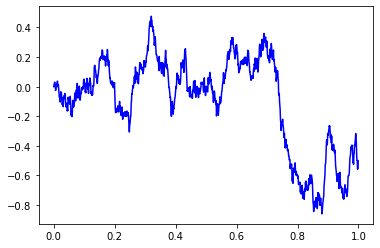

In [226]:
ys = zeros(N)
T = 1
for i in range(100):
    ts , xs = brownian(T ,1)
    ys[i]=xs[-1]
plt.plot(ts , xs ,"b")
plt.show ()

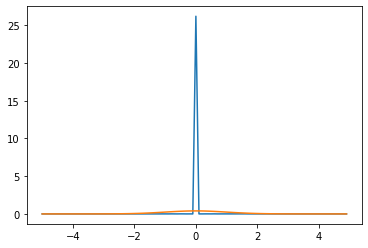

In [229]:
from scipy.stats.kde import gaussian_kde
kde = gaussian_kde (ys)
x = arange(-5,5,0.1)
plt.plot(x,kde(x))
plt.plot(x,exp(-x*x/2/T)/ sqrt (2*pi*T))
plt.show ()

## Relaxation Method for the Laplace equation

In [231]:
def relaxation (ts):
    res = ts [:]
    for x in range(1,sizex-1):
        for y in range(1,sizey-1):
            res[x,y]=( ts[x+1,y]+ts[x-1,y]+ts[x,y+1]+ ts[x,y-1])/4
    return res

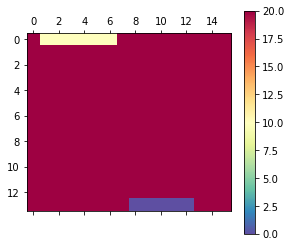

In [261]:
sizex = 14 #size of the room
sizey = 16
ts = array ([[20.]* sizey ]*sizex) #settting some initial values
for i in range(1 ,7):
    ts[0,i]=10 # setting boudnary values at the door
for i in range(8 ,13):
    ts[sizex-1,i]=0 # and the boundary values at the window
matshow(ts,cmap=cm.Spectral_r)
colorbar()

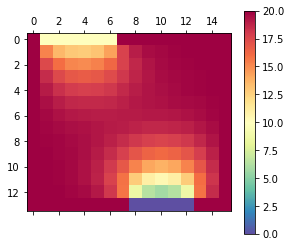

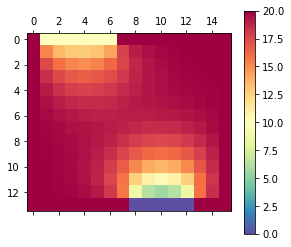

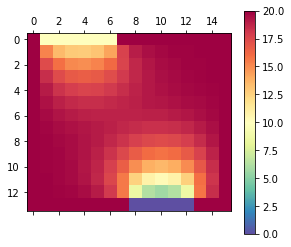

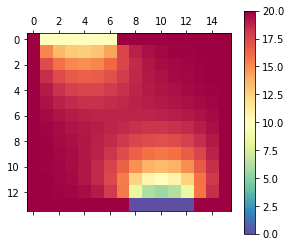

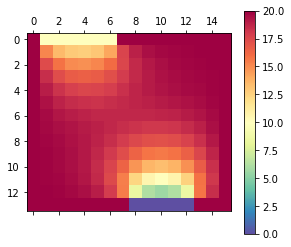

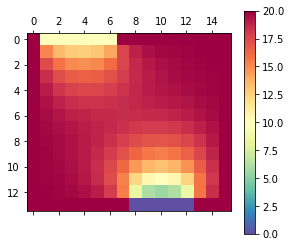

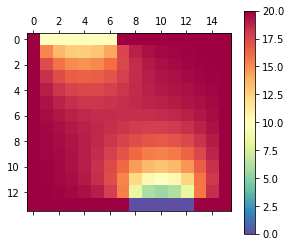

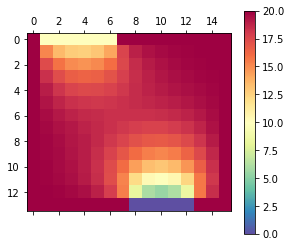

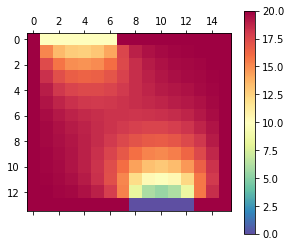

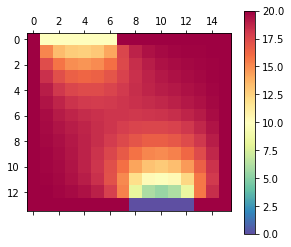

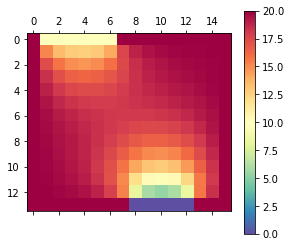

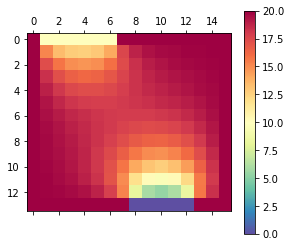

In [265]:
for i in range(12):
    ts = relaxation (ts)
    matshow(ts,cmap=cm.Spectral_r)
    colorbar()

Jacobi Method

In [236]:
def getcs(l,k,A):
    phi = -(2*A[k,l])/(A[k,k]-A[l,l])
    c = sqrt((1+ sqrt (1/(1+ phi**2)))/2)
    s = (1-2*c**2)*A[k,l]/(A[k,k]-A[l,l])/c
    return c,s

In [240]:
def remkl(l,k,A):
    c,s = getcs(l,k,A)
    n = A[0]. size
    B = A.copy ()
    for i in range(n):
        B[k,i] = c*A[k,i]-s*A[l,i]
        B[i,k] = B[k,i]
        B[l,i] = c*A[l,i]+s*A[k,i]
        B[i,l] = B[l,i]
    B[k,l] = 0
    B[l,k] = 0
    B[k,k] = c**2*A[k,k]+s**2*A[l,l]-2*c*s*A[k,l]
    B[l,l] = c**2*A[l,l]+s**2*A[k,k]+2*c*s*A[k,l]
    return B

In [241]:
def findmax(A):
    imax = 0
    jmax = 1
    maxval = abs(A[0 ,1])
    n = (A[0]). size
    for i in range(n):
        for j in range(i+1,n):
            if abs(A[i,j])>maxval:
                imax = i
                jmax = j
                maxval = abs(A[i,j])
    return imax , jmax , maxval

In [243]:
def diagonalize (A):
    B = A.copy ()
    maxc = 1
    while maxc>10**(-6):
            i,j,maxc = findmax(B)
            B = remkl(i,j,B)
            imshow(B, interpolation ='nearest')
            colorbar ()
            show ()
    return B

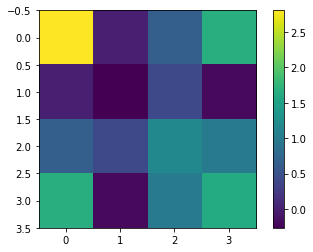

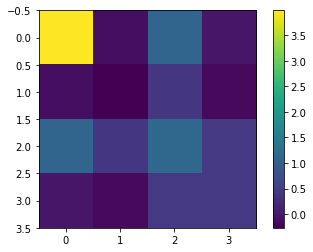

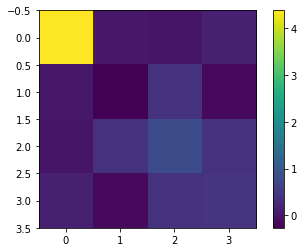

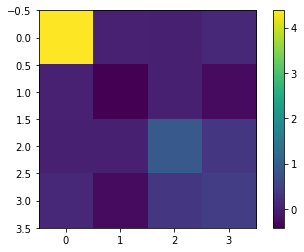

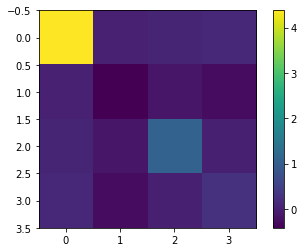

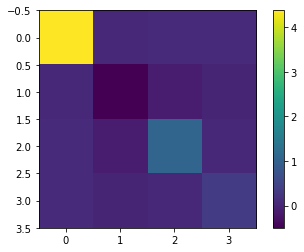

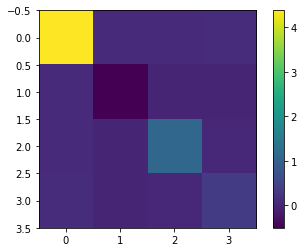

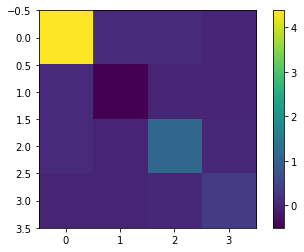

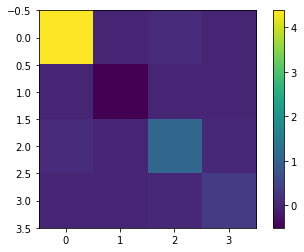

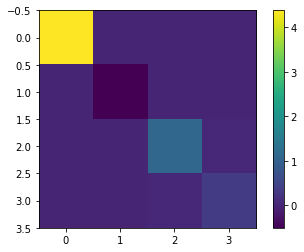

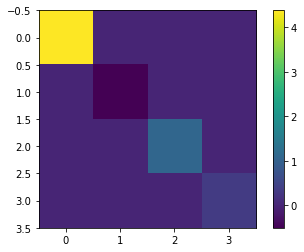

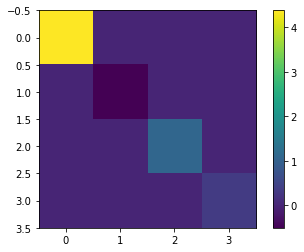

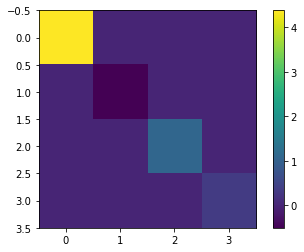

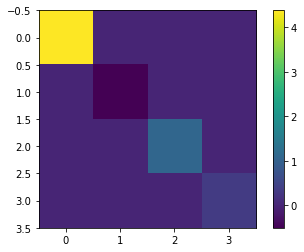

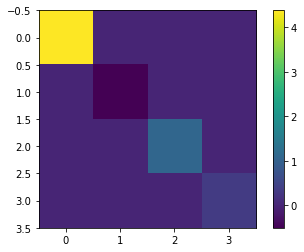

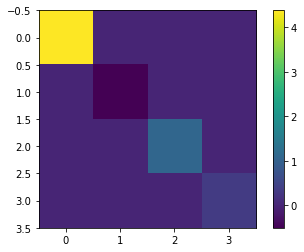

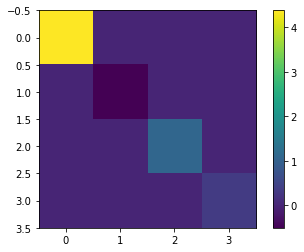

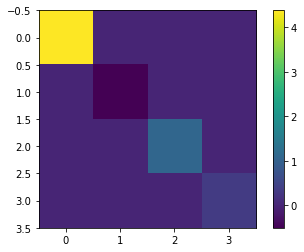

array([[ 4.38375239e+00,  1.05157729e-19, -1.78762331e-15,
        -1.94808740e-11],
       [ 1.05157729e-19, -5.07382982e-01,  3.45089994e-10,
         0.00000000e+00],
       [-1.78762331e-15,  3.45089994e-10,  1.10877482e+00,
         1.86279527e-18],
       [-1.94808740e-11,  0.00000000e+00,  1.86279527e-18,
         3.46863012e-01]])

In [244]:
A=random.random ((4 ,4))
A=A+ transpose (A)
diagonalize (A)